`Nested CV` is used to train a model in which hyper-parameters also need to be optimized. It estimates the generalization error of the underlying model and its parameter search, as choosing paramters that maximizes non-nested CV biases the model to the dataset, yielding an overly-optimistic score.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.datasets import load_iris 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold


In [2]:
#loading  the iris datas
iris = load_iris()
X_iris = iris.data 
y_iris = iris.target 

In [3]:
#number of random trials
NUM_TRIALS = 30
#setting up possible values of aprameters to optmize over 
p_grid = {"C": [1,10,100], "gamma":[0.01, 0.1]}

#using SVM with rbf kernel 
svm = SVC(kernel="rbf")

#Array to store scores 
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)


Average difference of 0.007581 with std. dev. of 0.007833.


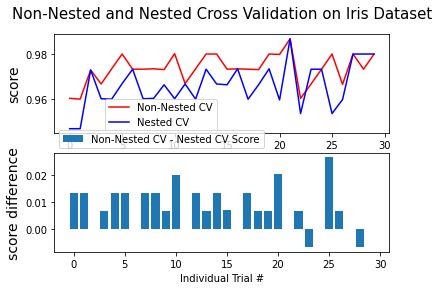

In [4]:
#loop for each trials 

for i in range(NUM_TRIALS):

   
    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=outer_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # Nested CV with parameter optimization
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print(
    "Average difference of {:6f} with std. dev. of {:6f}.".format(
        score_difference.mean(), score_difference.std()
    )
)

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
(non_nested_scores_line,) = plt.plot(non_nested_scores, color="r")
(nested_line,) = plt.plot(nested_scores, color="b")
plt.ylabel("score", fontsize="14")
plt.legend(
    [non_nested_scores_line, nested_line],
    ["Non-Nested CV", "Nested CV"],
    bbox_to_anchor=(0, 0.4, 0.5, 0),
)
plt.title(
    "Non-Nested and Nested Cross Validation on Iris Dataset",
    x=0.5,
    y=1.1,
    fontsize="15",
)

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend(
    [difference_plot],
    ["Non-Nested CV - Nested CV Score"],
    bbox_to_anchor=(0, 1, 0.8, 0),
)
plt.ylabel("score difference", fontsize="14")

plt.show()